# Embedding Diagrams in Schwarzschild

## Libraries

In [178]:
import numpy as np
import matplotlib.pyplot as plt

## Constants

In [179]:
c = 1
M = 1000
G = 1

dr_BK = 1
dt_BK = 1

rcoord = np.arange(3,10)
tcoord = np.arange(3,10)
phicoord = np.linspace(0, 2*np.pi, np.shape(rcoord)[0]*4)

## Shell Measurements

In [180]:
def dr_shell(r_coordinate):
    return np.true_divide(dr_BK, np.sqrt(np.subtract(1, np.true_divide(2*M, np.multiply(r_coordinate, M)))))

def dt_shell(r_coordinate):
    return np.multiply(dt_BK, np.sqrt(np.subtract(1, np.true_divide(2*M, np.multiply(r_coordinate, M)))))

## Plots

### Functions

#### Embedding

In [181]:
def create_embedding_figure(ax, BK_coordinate, shell_coordinates):
    for phi in phicoord:
        X = np.multiply(BK_coordinate, np.sin(phi))
        Y = np.multiply(BK_coordinate, np.cos(phi))
        Z = shell_coordinates

        ax.plot(X, Y, Z, 'b')
    
    for coord, shell in zip(BK_coordinate,shell_coordinates):
        X = np.multiply(coord, np.sin(phicoord))
        Y = np.multiply(coord, np.cos(phicoord))
        Z = shell

        ax.plot(X, Y, Z, 'b')

    return ax

#### Polar

In [182]:
def create_flat_embedding_figure(ax, BK_coordinate, shell_coordinates):
    summed_values = BK_coordinate + shell_coordinates

    for radius in summed_values:
        ax.plot(phicoord, np.multiply(radius, np.ones(np.shape(phicoord)[0])) )
 
    for phi in phicoord:
        angle = np.multiply(phi, np.ones(np.shape(summed_values)[0]))
        ax.plot(angle, summed_values, c='black', alpha=0.5)

    ax.set_rmax(summed_values[-1])
    ax.set_rorigin(2)

    return ax

# Figures

### Distance

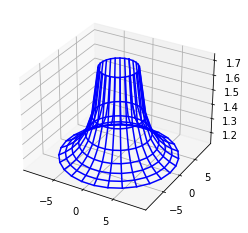

In [183]:
contracted_r_coordinates = dr_shell(r_coordinate=rcoord)

fig = plt.figure()
ax_embedding = fig.add_subplot(projection='3d')
distance_embedding = create_embedding_figure(ax_embedding, rcoord, contracted_r_coordinates)

### Time

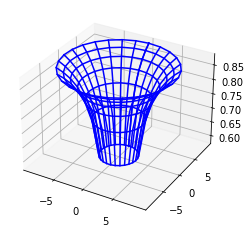

In [184]:
dilated_t_coordinates = dt_shell(r_coordinate=rcoord)

fig = plt.figure()
ax_embedding = fig.add_subplot(projection='3d')
temporal_embedding = create_embedding_figure(ax_embedding, tcoord, dilated_t_coordinates)

### Polar

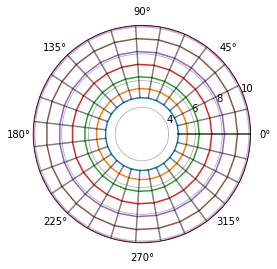

In [185]:
contracted_r_coordinates = dr_shell(r_coordinate=rcoord)

fig = plt.figure()
ax_flatpolar = fig.add_subplot(polar=True)

flat_distance = create_flat_embedding_figure(ax_flatpolar, rcoord, contracted_r_coordinates)

### Mixed

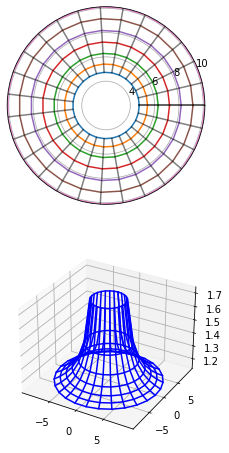

In [195]:
contracted_r_coordinates = dr_shell(r_coordinate=rcoord)

fig = plt.figure(figsize=(4,8))

ax_flatpolar = fig.add_subplot(211,polar=True)
ax_embedding = fig.add_subplot(212,projection='3d')

flat_distance = create_flat_embedding_figure(ax_flatpolar, rcoord, contracted_r_coordinates)

angles =[0, 45, 90, 135, 180, 225, 270, 315]
ax_flatpolar.set_thetagrids(angles, labels=['' for x in angles])

distance_embedding = create_embedding_figure(ax_embedding, rcoord, contracted_r_coordinates)

plt.show()